# Predicting Loan Payback

In this project, I will be using a publicly available dataset from LendingClub. LendingClub is a peer-to-peer lending company. 
Investors are often interested in learning how risky (i.e. the probability of loan payback) a borrower is. This project attempts to predict the people who have high probability of paying back their loans. 


### Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import os

Description of each feature in the dataset:

- **credit.policy:** 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
- **purpose:** The purpose of the loan, such as credit_card, debt_consolidation, educational etc.
- **int.rate:** The interest rate of the loan as a proportion.
- **installment:** The monthly installments owed by the borrower if the loan is funded.
- **log.annual.inc:** The natural log of the self-reported annual income of the borrower.
- **dti:** The debt-to-income ratio of the borrower.
- **fico:** The FICO credit score of the borrower.
- **days.with.cr.line:** The number of days the borrower has had a credit line.
- **revol.bal:** The borrower's revolving balance (i.e. amount unpaid at the end of the credit card billing cycle).
- **revol.util:** The borrower's revolving line utilization rate (i.e. the amount of the credit line used relative to total credit available).
- **inq.last.6mths:** The borrower's number of inquiries by creditors in the last 6 months.
- **delinq.2yrs:** The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
- **pub.rec:** The borrower's number of derogatory public records.
- **no.fully.paid:** Indicates whether the loan was not fully paid back. 

### Load data

In [2]:
dat = pd.read_csv("loan_data.csv", encoding = 'unicode_escape')

In [3]:
dat.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
dat.shape

(9578, 14)

In [5]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


The only categorical variable is 'purpose'.

In [6]:
dat.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [7]:
# Checking null values
dat.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

## Exploratory Analysis

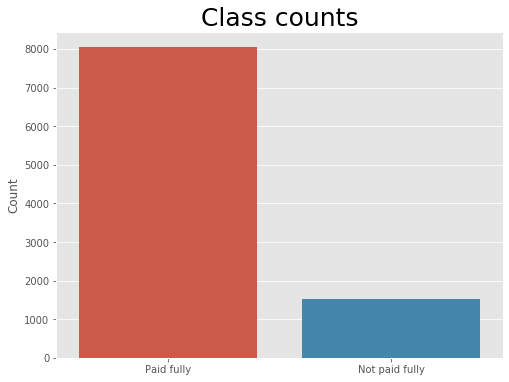

In [8]:
# Get the number of paid fully and not paid fully examples
notpaid = dat[dat["not.fully.paid"] == 1].shape[0]
paid = dat[dat["not.fully.paid"] == 0].shape[0]
plt.figure(figsize=(8, 6))
sns.countplot(dat["not.fully.paid"])
plt.xticks((0, 1), ["Paid fully", "Not paid fully"])
plt.xlabel("")
plt.ylabel("Count")
plt.title("Class counts", fontsize=25)
plt.show()

In [9]:
print(f"Number of not paid fully examples = {notpaid}") 
print(f"Number of paid fully examples = {paid}")
print(f"Proportion of not paid fully to paid fully examples = {(notpaid / paid) * 100:.2f}%")

Number of not paid fully examples = 1533
Number of paid fully examples = 8045
Proportion of not paid fully to paid fully examples = 19.06%


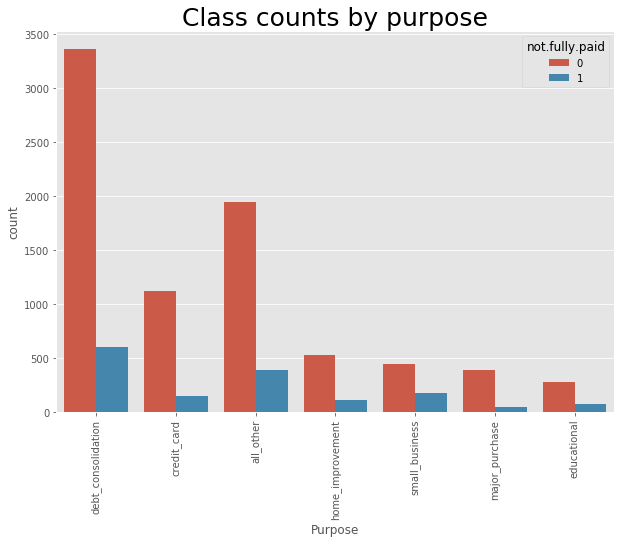

In [10]:
# Class counts by purpose
plt.figure(figsize=(10,7))
sns.countplot('purpose', hue='not.fully.paid', data=dat)
plt.title("Class counts by purpose", fontsize=25)
plt.xlabel("Purpose")
#Plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

#### Observation:
- People borrowed for debt_consolidation, credit_card, and all_other purposes have higher rate of paying back than rest of the purposes.

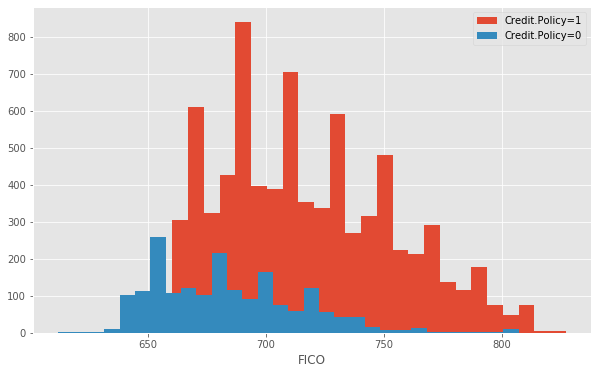

In [11]:
# Checking credit policy outcome based on FICO score
plt.figure(figsize=(10,6))
plt.hist(dat['fico'].loc[dat['credit.policy']==1], bins=30, label='Credit.Policy=1')
plt.hist(dat['fico'].loc[dat['credit.policy']==0], bins=30, label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')
plt.show()

#### Observation:
- It's no surprise that people with higher FICO score match the credit policy more than those who have lower FICO score.

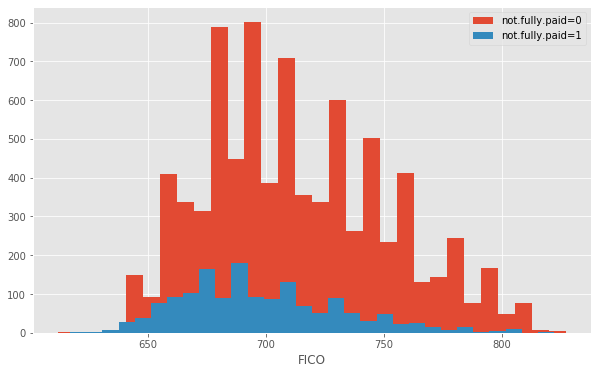

In [12]:
# Checking paid/not paid based on FICO score
plt.figure(figsize=(10,6))
plt.hist(dat['fico'].loc[dat['not.fully.paid']==0], bins=30, label='not.fully.paid=0')
plt.hist(dat['fico'].loc[dat['not.fully.paid']==1], bins=30, label='not.fully.paid=1')
plt.legend()
plt.xlabel('FICO')
plt.show()

#### Observation:
- People with higher FICO score are inclined to fully pay back their loans, thus are less risky borrowers. 

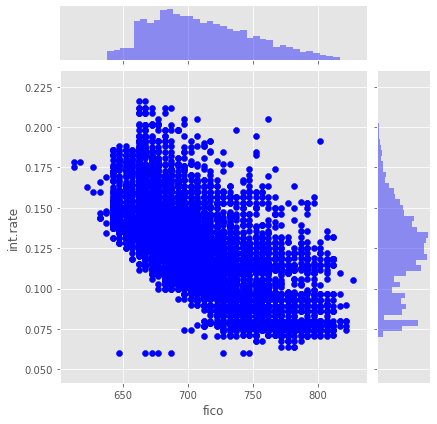

In [13]:
# FICO score vs Interest rate
sns.jointplot(data=dat, x='fico', y='int.rate', color='Blue', size=6)
plt.show()

#### Observation:
- Interest rate decreases with increasing FICO score.

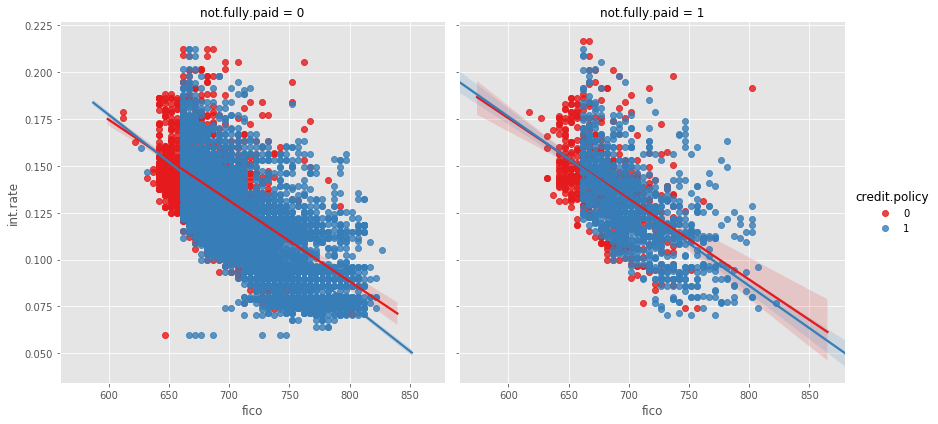

In [14]:
# FICO score vs Interest rate based on credit policy
sns.lmplot(x='fico', y='int.rate', data=dat, hue='credit.policy', col='not.fully.paid', palette='Set1', size=6)
plt.show()

---

# Modelling

Before applying any machine learning model, the categorical variable 'purpose' needs to be converted to numerical variables so that we can build our feature matrix. To do so, we will be using pandas pd.get_dummies function. 

In [15]:
# Create dummy variables from the feature purpose
dat1 = pd.get_dummies(dat, columns=["purpose"], drop_first=True)
dat1.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [16]:
dat1.shape

(9578, 19)

#### Extract 'feature matrix' and 'target array'

In [17]:
# Extract Feature Matrix
X = dat1.drop('not.fully.paid', axis=1)
X.shape

(9578, 18)

In [18]:
# Extract the target array
y = dat1['not.fully.paid']
y.shape

(9578,)

#### Train Test split
Let's split the dataset into training set (70%) and testing set (30%).

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Decision Trees

In [20]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
prediction = dtree.predict(X_test)

#### Model performance

In [21]:
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
confusion = confusion_matrix(y_test, prediction)
print("Confusion matrix:\n{}".format(confusion))

Confusion matrix:
[[1988  418]
 [ 361  107]]


The confusion matrix is a two-by two array where the rows correspond to the true classes and the columns correspond to the predicted classes. There are several ways to summarize information from the confusion matrix such as precision, recall, f1-score. 

- **Precision:** measures how many of the samples predicted as positive are actually positive, i.e. (TP)/(TP+FP).
- **Recall:** measures how many of the positive samples are captured by the positive predictions, i.e. (TP)/(TP+FN).
- **f1-score:** is the harmonic mean of precision and recall, i.e. (2*TP)/(2*TP+FP+FN).

We can use the 'classification_report' function to compute these three at once and print them in a nice format.

In [22]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, prediction)) 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2406
           1       0.20      0.23      0.22       468

    accuracy                           0.73      2874
   macro avg       0.53      0.53      0.53      2874
weighted avg       0.74      0.73      0.74      2874



#### Feature importance:

In [23]:
# Calculate feature importances
importances = dtree.feature_importances_
print("Feature importances:")
print(dtree.feature_importances_)

Feature importances:
[0.0266347  0.12727021 0.09306285 0.1154289  0.11530411 0.07529836
 0.10758409 0.09930575 0.1248075  0.03797122 0.02436481 0.00914465
 0.00918231 0.0121965  0.00359327 0.00610897 0.00390508 0.00883673]


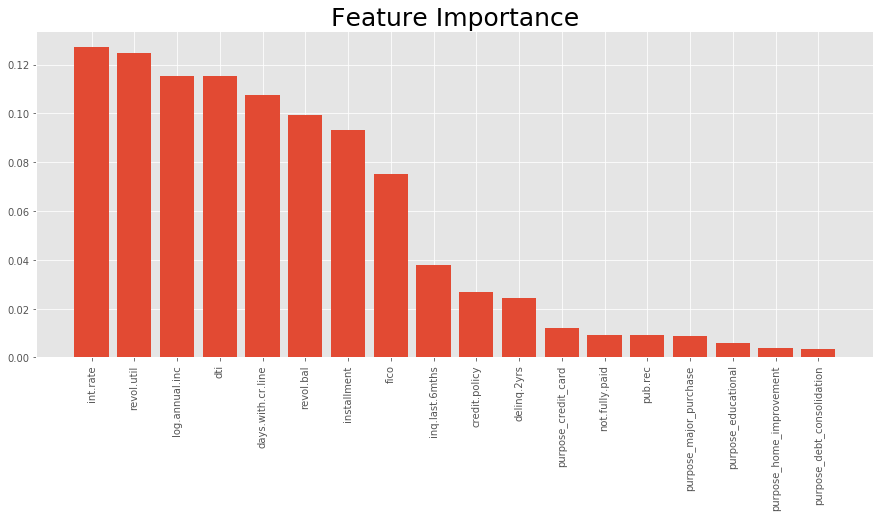

In [24]:
# Plot feature importances
indices = np.argsort(importances)[::-1] 
names = [dat1.columns[i] for i in indices]
plt.figure(figsize=(15,6))
plt.title("Feature Importance", fontsize=25)
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

---

# Random Forests

In [25]:
from sklearn.ensemble import RandomForestClassifier
rforests = RandomForestClassifier(n_estimators=1000)
rforests.fit(X_train, y_train)
predictionRF = rforests.predict(X_test)

#### Model performance

In [26]:
# Get the confusion matrix and classification report
confusionRF = confusion_matrix(y_test, predictionRF)
print("Confusion matrix:\n{}".format(confusionRF))
print(classification_report(y_test, predictionRF))

Confusion matrix:
[[2392   14]
 [ 460    8]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2406
           1       0.36      0.02      0.03       468

    accuracy                           0.84      2874
   macro avg       0.60      0.51      0.47      2874
weighted avg       0.76      0.84      0.77      2874



#### Feature importance:

Feature importances:
[0.01614731 0.10356501 0.11201967 0.11072693 0.11147538 0.07917281
 0.11346606 0.11111163 0.11367952 0.05417326 0.01434057 0.00943806
 0.00833981 0.01459846 0.00600076 0.00762208 0.0051938  0.00892887]


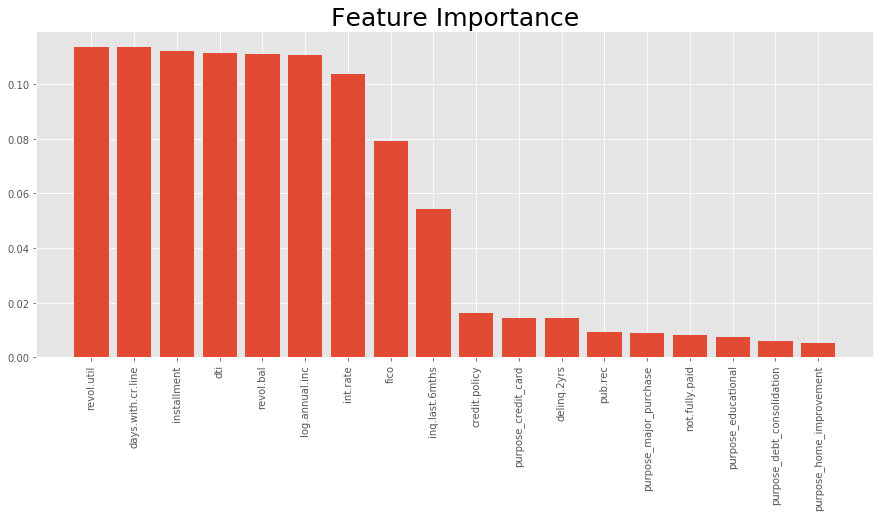

In [27]:
# Calculate feature importances
importances = rforests.feature_importances_
print("Feature importances:")
print(rforests.feature_importances_)

# Plot feature importances
indices = np.argsort(importances)[::-1]               
names = [dat1.columns[i] for i in indices]
plt.figure(figsize=(15,6))
plt.title("Feature Importance", fontsize=25)
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

---

# Gradient Boosting

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
gboosting = GradientBoostingClassifier(random_state=0, max_depth=1)
gboosting.fit(X_train, y_train)
predictionGB = gboosting.predict(X_test)

In [29]:
confusionGB = confusion_matrix(y_test, predictionGB)
print("Confusion matrix:\n{}".format(confusionGB))
print(classification_report(y_test, predictionGB))

Confusion matrix:
[[2405    1]
 [ 468    0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2406
           1       0.00      0.00      0.00       468

    accuracy                           0.84      2874
   macro avg       0.42      0.50      0.46      2874
weighted avg       0.70      0.84      0.76      2874



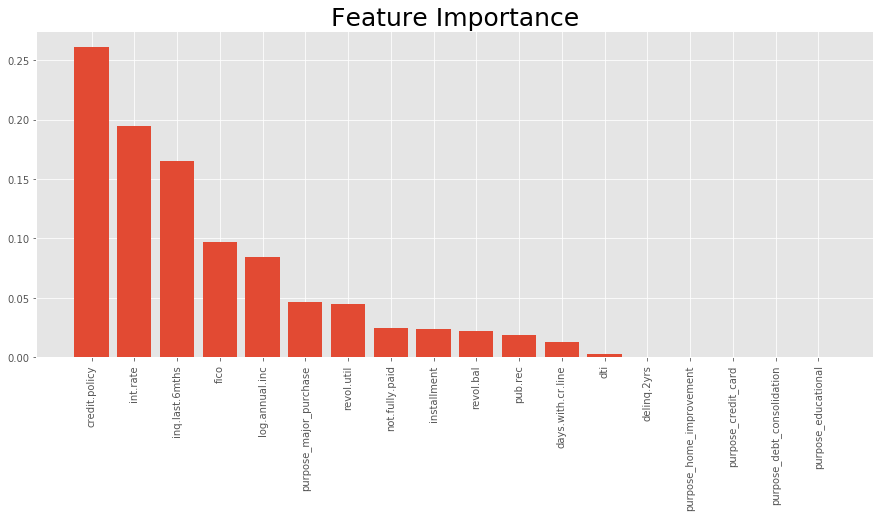

In [30]:
# Calculate feature importances
importances = gboosting.feature_importances_

# Plot feature importances
indices = np.argsort(importances)[::-1]               
names = [dat1.columns[i] for i in indices]
plt.figure(figsize=(15,6))
plt.title("Feature Importance", fontsize=25)
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()

We see that gradient boosting completely ignored some of the features.

# Conclusion:
- The gradient boosting model and random forests model give us the highest accuracy 84%, whereas decision trees gives 73% accuracy.
- In terms of precision, all three models performed similarly for class 0.
- In terms of recall and f1-score, random forests and gradient boosting performed much better than decision tree for class 0.
- For class 1, none of the models performed well. However, decision trees did a better job in terms of recall.


---